# EDA sur la réussite scolaire d'étudiants portuguais

![Texte alternatif…](https://3.bp.blogspot.com/-RC2KuZObnhs/UQHTIzRHN2I/AAAAAAAAWJ0/f31Ve2Zkotk/s1600/Col%C3%A9gio+Jo%C3%A3o+Paulo+II+(11)

In [0]:
! pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
# Library imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(13,9)})

In [0]:
# Load CSV

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('./students.csv', index_col=0)

Saving students.csv to students.csv


# 1. Analyse globale du dataset

In [0]:
# Informations about datas

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        391 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          343 non-null object
Fjob          345 non-null object
reason        395 non-null object
guardian      381 non-null object
traveltime    337 non-null float64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 

- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

- **sex**: student's sex (binary: 'F' - female or 'M' - male)

- **age**: student's age (numeric: from 15 to 22)

- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)

- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')

- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)

- **schoolsup**: extra educational support (binary: yes or no)

- **famsup**: family educational support (binary: yes or no)

- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

- **activities**: extra-curricular activities (binary: yes or no)

- **nursery**: attended nursery school (binary: yes or no)

- **higher**: wants to take higher education (binary: yes or no)

- **internet**: Internet access at home (binary: yes or no)

- **romantic**: with a romantic relationship (binary: yes or no)

- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)

- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)

- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

- **health**: current health status (numeric: from 1 - very bad to 5 - very good)

- **absences**: number of school absences (numeric: from 0 to 93)

- **G1**: first period grade (numeric: from 0 to 20)

- **G2**: second period grade (numeric: from 0 to 20)

- **G3**: final grade (numeric: from 0 to 20)

In [0]:
# Looking first rows

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,NaN,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 2. Analyse de la note finale G3

![Texte alternatif…](https://collegesaintlouis.ecolelachine.com/wp-content/uploads/2014/08/ecole-privee-examens-dadmission-630x325.jpg)

In [0]:
# Investigating G3 marks

df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [0]:
# Important values for G3 

G3_mean = round(df.G3.mean(), 2)
G3_median = round(df.G3.median(), 2)
mark_min = round(df.G3.min(), 2)
mark_max = round(df.G3.max(), 2)
percent_success = round(df.G3[df.G3 > 10].count() / df.G3.count() * 100, 2)

print("La moyenne des étudiants à l'examen final est de {}.\nLa médiane est à {} et les notes s'étalent de {} à {}.\nEnfin, le pourcentage de succès à G3 est de {}%"
      .format(G3_mean, G3_median, mark_min, mark_max, percent_success))

La moyenne des étudiants à l'examen final est de 10.42.
La médiane est à 11.0 et les notes s'étalent de 0 à 20.
Enfin, le pourcentage de succès à G3 est de 52.91%


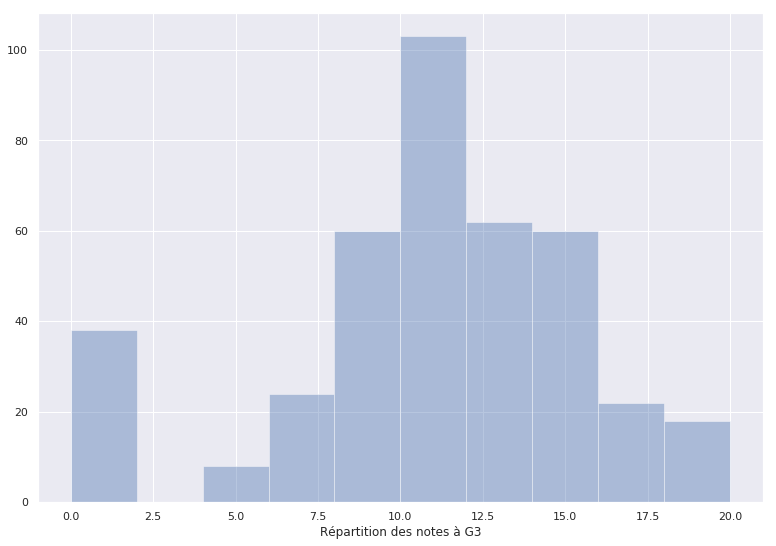

In [0]:
sns.distplot(df.G3.dropna(),bins=10, kde=False, axlabel="Répartition des notes à G3")

### Nous constatons une forme de gaussienne pour la majorité des notes à G3. Cependant, un pic à 0 sort du lot.
#### Investiguons ce pic :

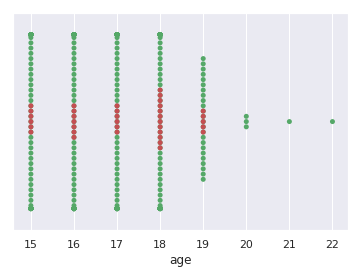

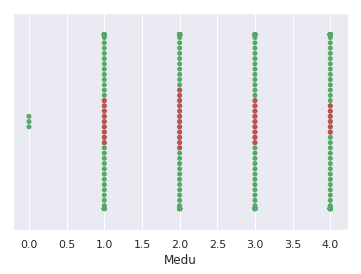

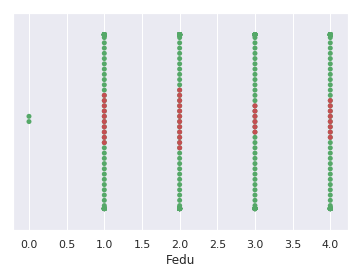

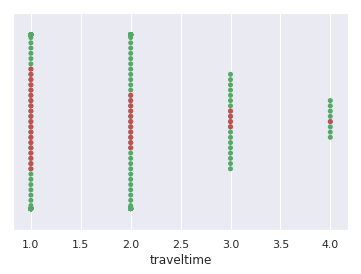

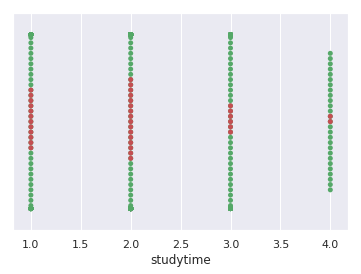

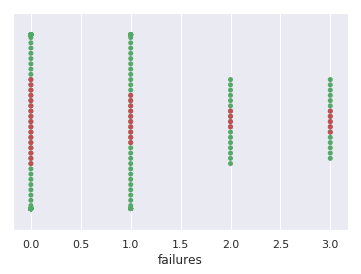

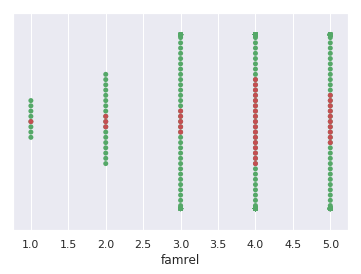

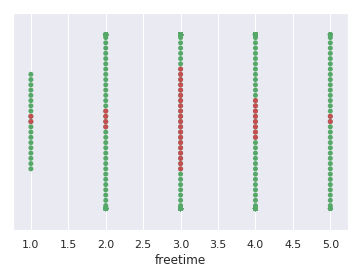

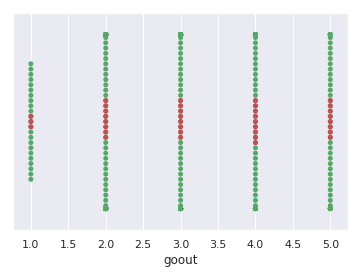

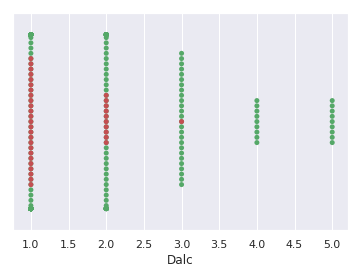

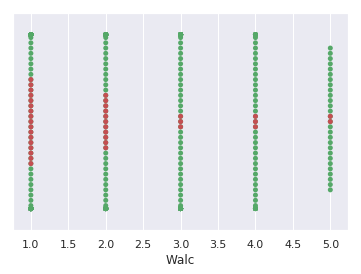

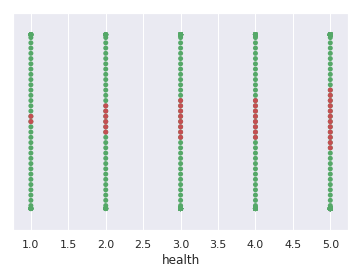

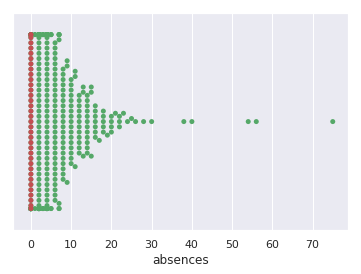

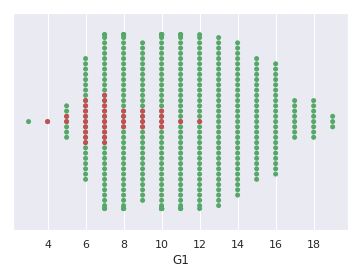

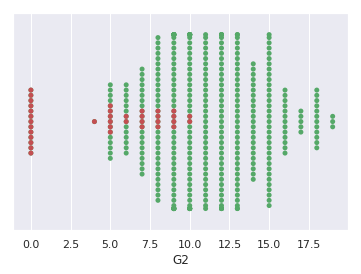

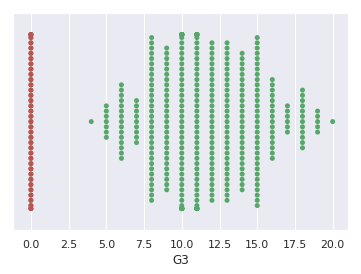

In [0]:
# Analyze students with mark 0 at G3

df_no_G3 = df[df.G3 == 0].select_dtypes(include=['int', 'float64']).dropna()
columns_no_G3 = list(df_no_G3.columns.values)

sns.set(rc={'figure.figsize':(6,4)})
for x in columns_no_G3:
    plt.figure(x)
    sns.swarmplot(df[x], color="g")
    sns.swarmplot(df_no_G3[x], color="r")
sns.set(rc={'figure.figsize':(13,9)})

#### Nous constatons que les élèves recevant la note de 0 à G3 sont dans la norme des caractéristiques étudiées.
#### La seule différence provient des notes à G1 qui sont plus faibles et G2 encore plus avec déjà un certain nombre d'abandons.
#### Puisque ces données ne sont pas "fausses" mais correspondent à des étudiants ayant abandonné en cours de route suite aux examens intermédiaires médiocres, nous décidons de garder







# 3. Recherche de features en correlation avec G3

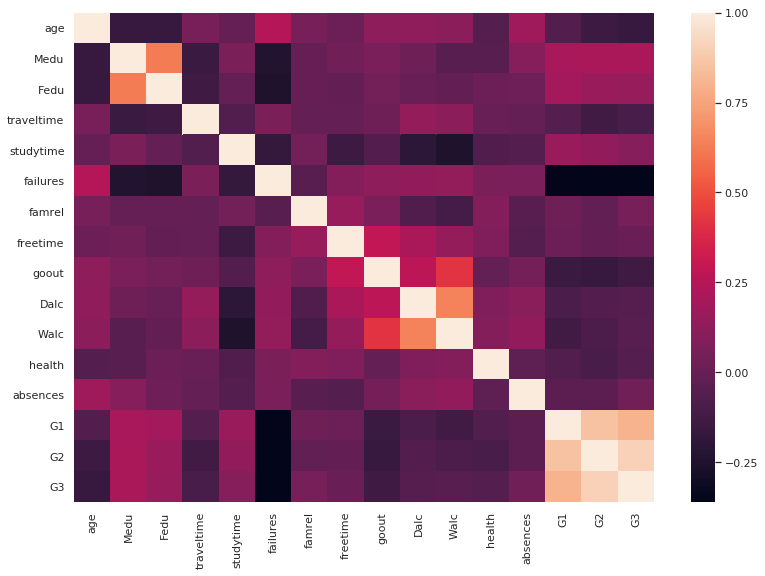

In [0]:
# Recherche de features fusionnables :
sns.heatmap(df.corr())

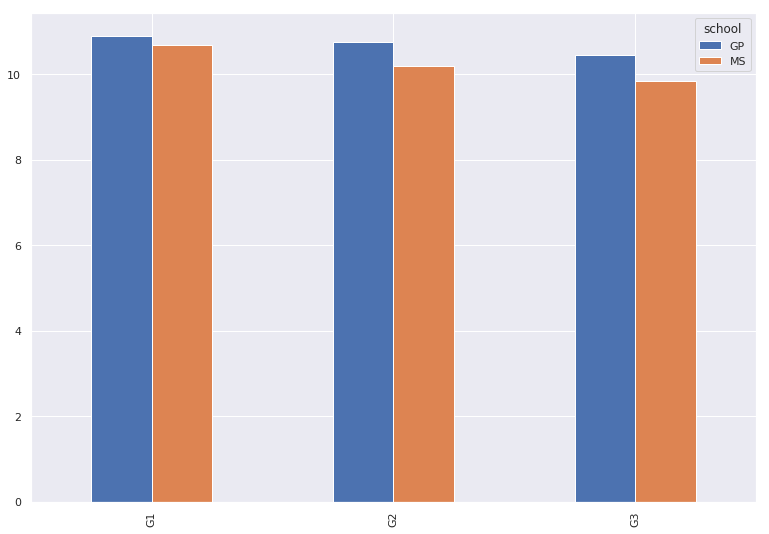

In [0]:
# School comparison

df.groupby(["school"])["G1", "G2", "G3"].mean().T.plot.bar()

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


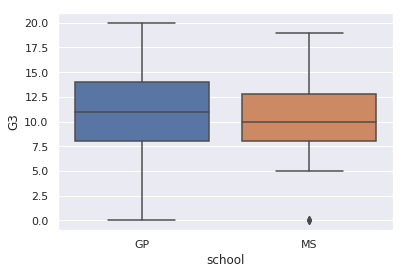

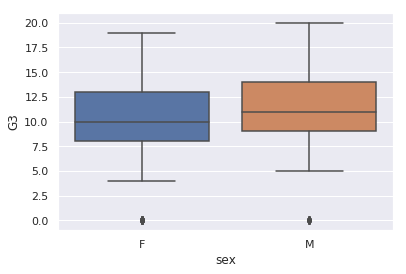

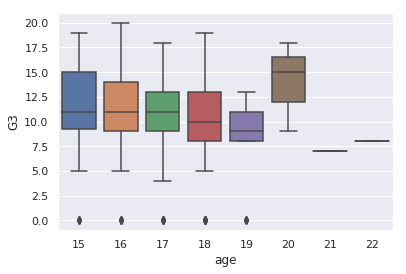

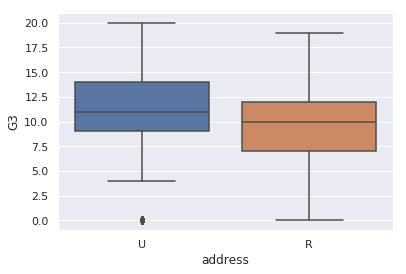

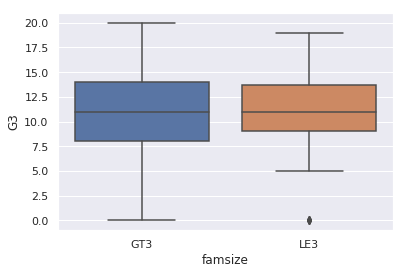

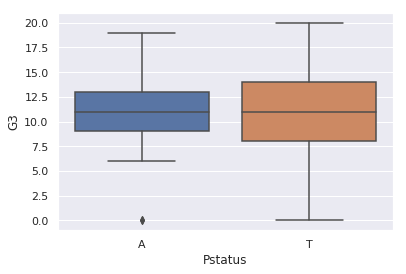

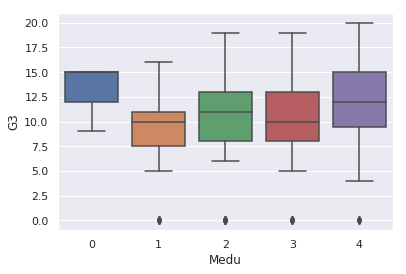

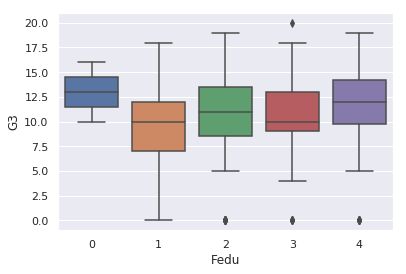

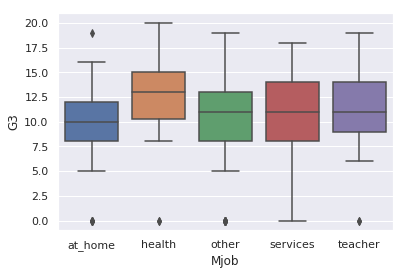

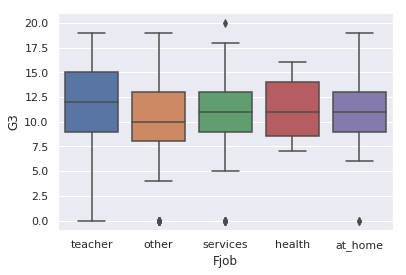

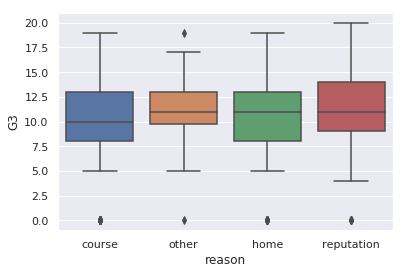

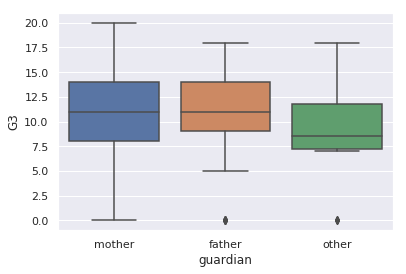

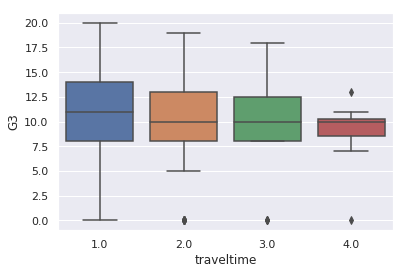

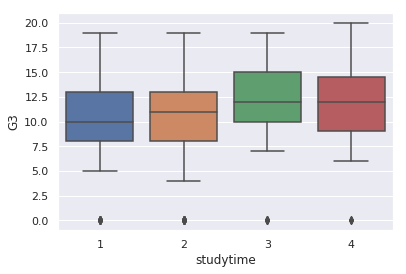

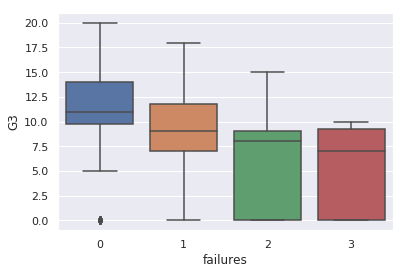

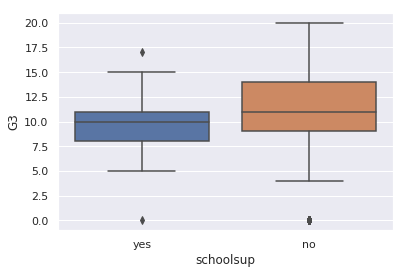

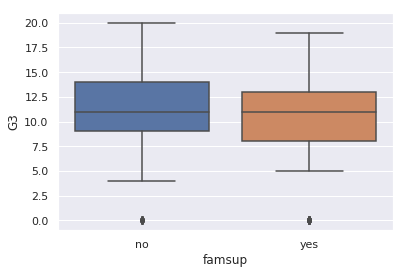

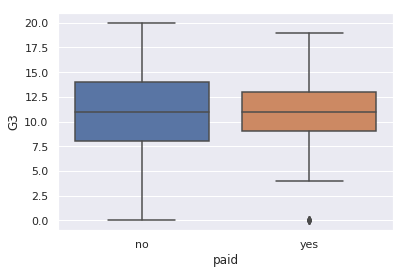

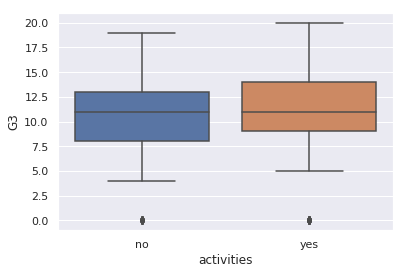

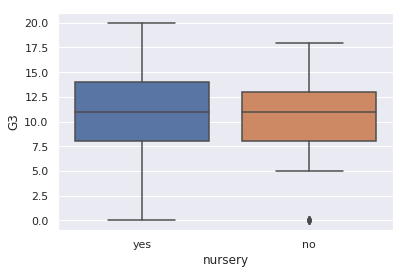

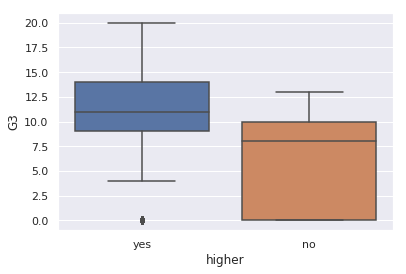

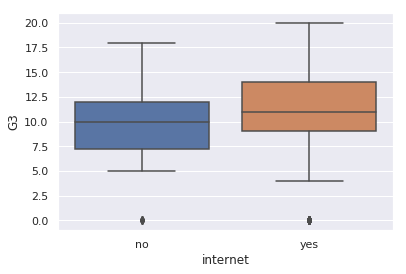

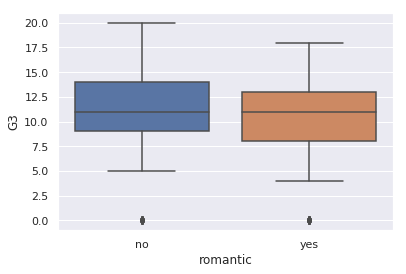

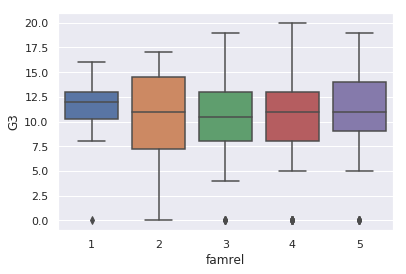

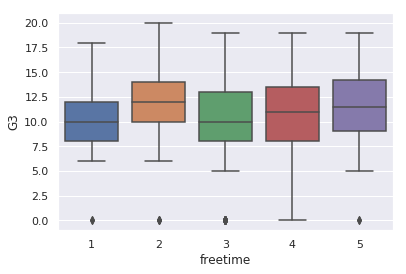

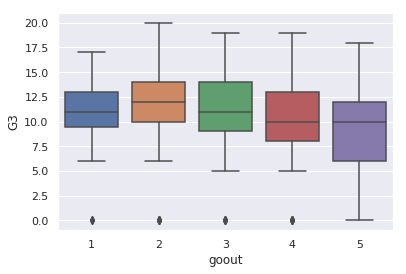

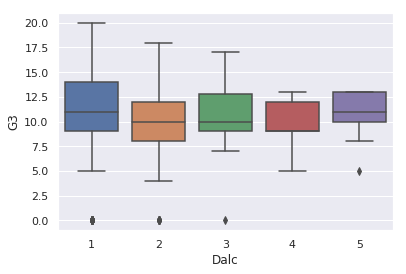

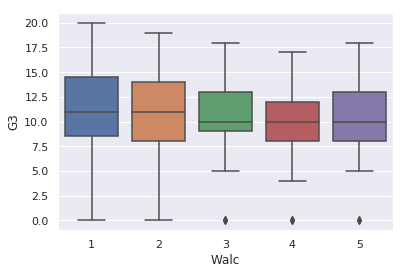

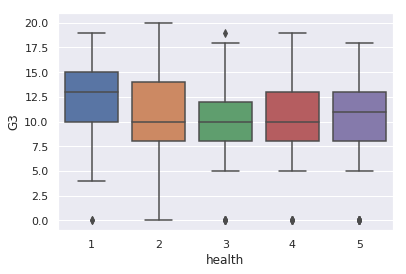

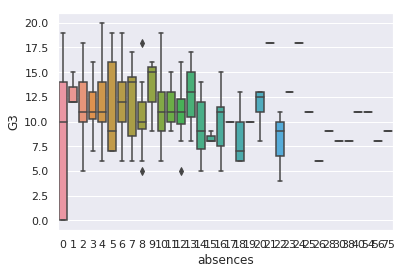

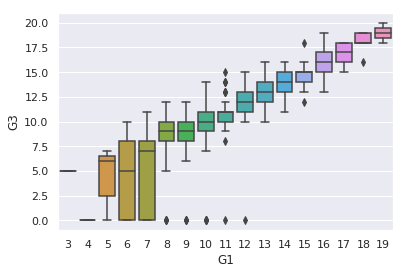

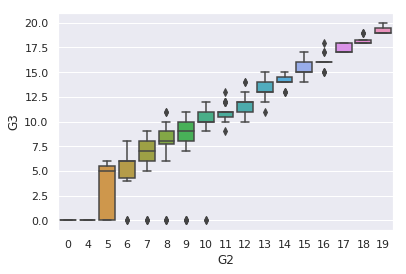

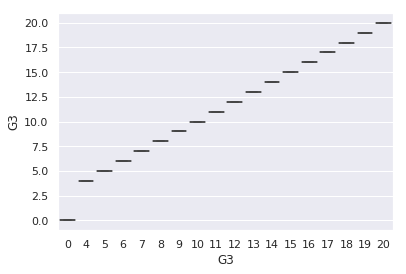

In [0]:
# Plot all features against G3

columns = list(df.columns.values)

sns.set(rc={'figure.figsize':(6,4)})
for x in columns:
    plt.figure(x)
    sns.boxplot(x=df[x].dropna(), y=df.G3)
sns.set(rc={'figure.figsize':(13,9)})

#### Nous retenons donc les features suivantes pour analyse plus poussée :

### Âge, Medu, Fedu, Studytime, Failures, Schoolsup, Higher, G1, G2

## 3.1 Correlation entre la réussite aux examens G1 et G2 et la réussite à G3

![Texte alternatif…](https://studentsuccess.utexas.edu/sites/default/files/styles/utexas_hero_photo_image_mobile/public/hero-photos/graduation-help-desk-home.jpg?itok=O_uieEiE)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:2400: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


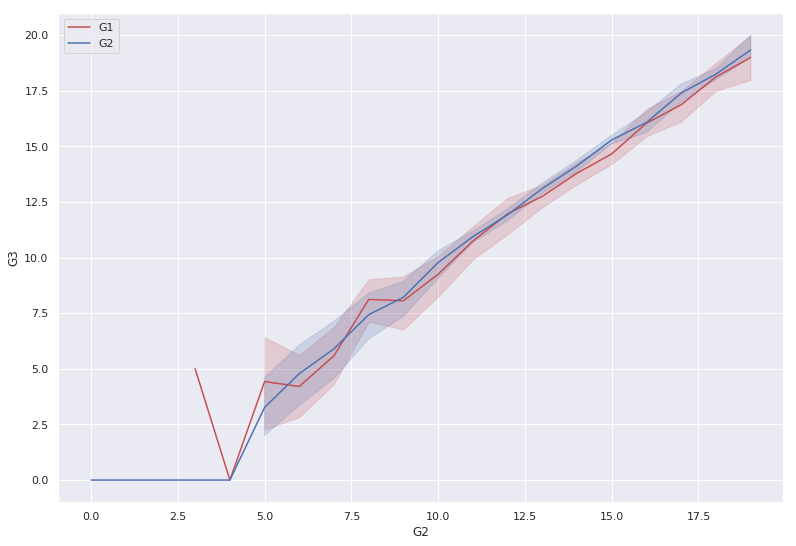

In [0]:
# Correlation between G1 x G3 and G2 x G3

sns.lineplot(x = df.G1, y = df.G3, c='r', label='G1')
sns.lineplot(x = df.G2, y = df.G3, c='b', label='G2')

In [0]:
a1 = df[(df['G1'] >= 10) & (df['G2'] >= 10)] #On récupère les étudiants avec une note supérieure à 10 sur G1 et G2
a2 = a1[a1['G3'] >= 10] #Sur ces étudiants, on récupère ceux qui ont eu une note supérieure à 10 sur G3

a3 = a1['G1'].count()/df['G1'].count() #On calcule le pourcentage d'étudiants qui ont eu une note supérieure à 10 sur G1 et G2
a4 = a2['G3'].count()/a1['G1'].count() #On calcule le pourcentage d'étudiants qui ont eu une note supérieure à 10 sur G3 parmis le poucentage précédent

print("% d'étudiant qui ont la moyenne a G1 et G2 : ", a3)
print("% d'étudiant parmis a3 qui ont la moyenne à G3 : ", a4)

% d'étudiant qui ont la moyenne a G1 et G2 :  0.569620253164557
% d'étudiant parmis a3 qui ont la moyenne à G3 :  0.9822222222222222


In [0]:
b1 = df[(df['G1'] >= 10) & (df['G2'] < 10)]
b2 = b1[b1['G3'] >= 10]

b3 = b1['G1'].count()/df['G1'].count()
b4 = b2['G3'].count()/b1['G1'].count()

print("% d'étudiant qui ont la moyenne a G1 et pas a G2 : ", b3)
print("% d'étudiant parmis a3 qui ont la moyenne à G3 : ", b4)

% d'étudiant qui ont la moyenne a G1 et pas a G2 :  0.07088607594936709
% d'étudiant parmis a3 qui ont la moyenne à G3 :  0.21428571428571427


In [0]:
c1 = df[(df['G1'] < 10) & (df['G2'] >= 10)]
c2 = c1[c1['G3'] >= 10]

c3 = c1['G1'].count()/df['G1'].count()
c4 = c2['G3'].count()/c1['G1'].count()

print("% d'étudiant qui ont la moyenne a G2 et pas a G1 : ", c3)
print("% d'étudiant parmis a3 qui ont la moyenne à G3 : ", c4)

% d'étudiant qui ont la moyenne a G2 et pas a G1 :  0.060759493670886074
% d'étudiant parmis a3 qui ont la moyenne à G3 :  0.8333333333333334


In [0]:
d1 = df[(df['G1'] < 10) & (df['G2'] < 10)]
d2 = d1[d1['G3'] >= 10]

d3 = d1['G1'].count()/df['G1'].count()
d4 = d2['G3'].count()/d1['G1'].count()

print("% d'étudiant qui n'ont pas la moyenne a G1 et a G2 : ", d3)
print("% d'étudiant parmis a3 qui ont la moyenne à G3 : ", d4)

% d'étudiant qui n'ont pas la moyenne a G1 et a G2 :  0.29873417721518986
% d'étudiant parmis a3 qui ont la moyenne à G3 :  0.15254237288135594


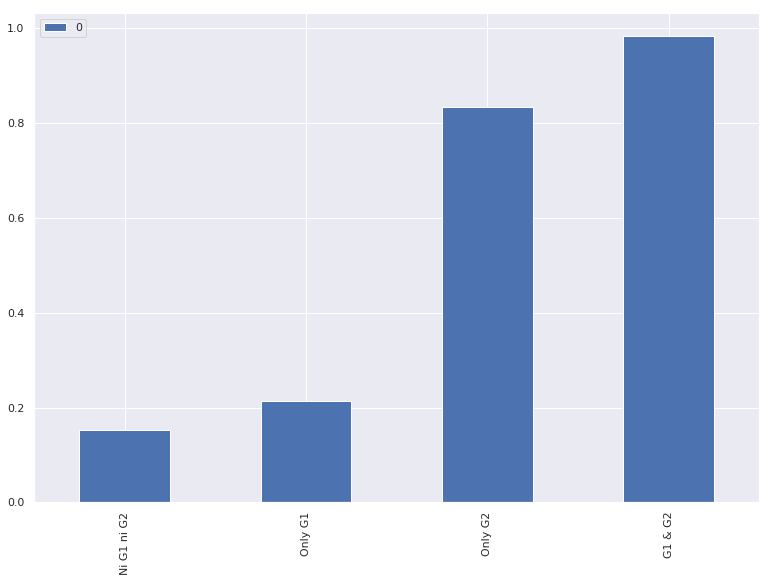

In [0]:
yes = pd.DataFrame(data=[d4, b4, c4, a4], index=["Ni G1 ni G2", "Only G1", "Only G2", "G1 & G2"])

yes.plot.bar()

#### On observe que si les étudiants ont réussi G1 et G2, il y a des très grandes chances qu'ils réussissent G3 (plus de 98%). Au contraire, s'ils ont échoué à G1 et G2, seulement 15% réussissent G3.

#### Il est aussi interessant de noter que G2 à plus d'impact sur la réussite de G3 que G1. En effet, si un élève échoue à G2, il y a de très grande chance qu'il rate G3. À l'inverse, en cas de réussite à G2, il y a de très grandes chances qu'il réussissent G3 même s'il a échoué à G1.* observe qu

## 3.2 Rapport entre l'éducation des parents et les résultats aux examens

![Texte alternatif…](http://cdn.3plearning.com/wp-content/uploads/2015/01/Mathletics-Parents.png)

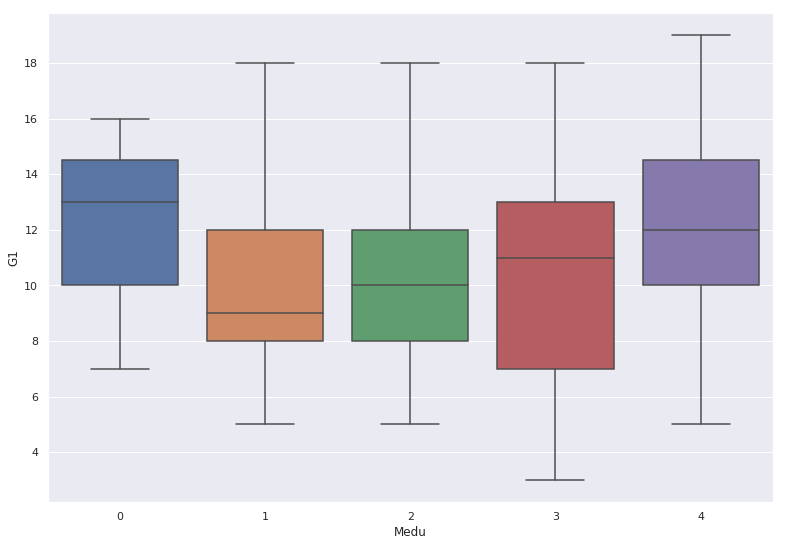

In [0]:
sns.boxplot(x="Medu", y="G1", data=df)

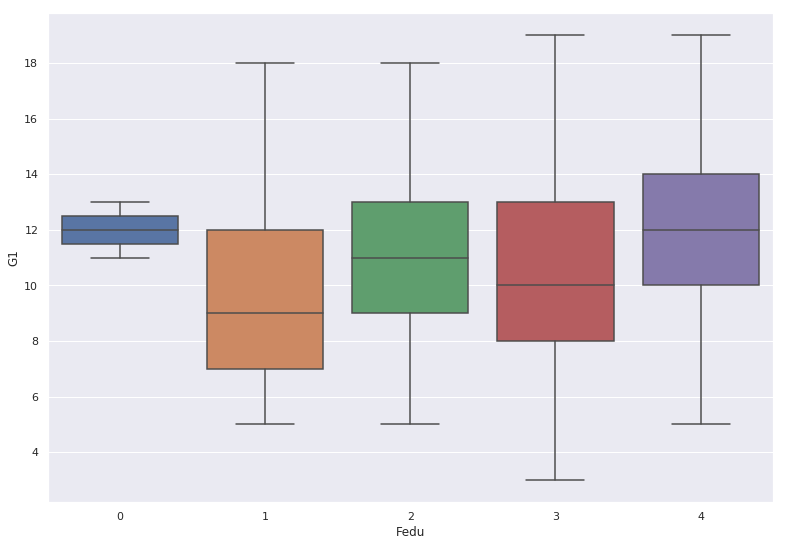

In [0]:
sns.boxplot(x="Fedu", y="G1", data=df)

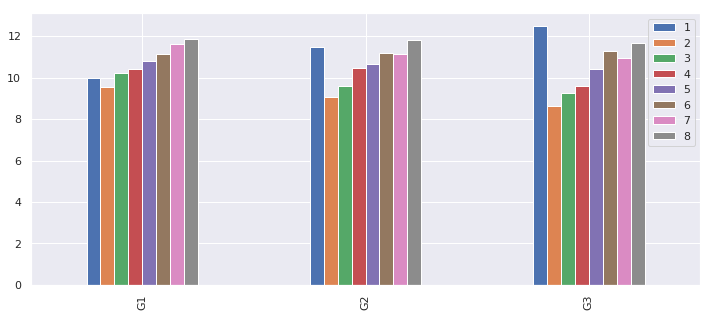

In [0]:
parents_edu = pd.concat([df["Fedu"] + df["Medu"]])
df.groupby(parents_edu)["G1", "G2", "G3"].mean().T.plot.bar(figsize=(12, 5))

#### On remarque donc que pour le premier examen, les élèves dont les parents ont le plus on de diplôme sont ceux qui ont des bonnes notes. Mais pour le deuxième ainsi que le troisième examen, on peut voir que les étudiants ayant des parents qui n'ont presque pas de diplôme obtienne en moyenne des notes presques égales au étudiants ayant des parents qui ont des diplômes, et sur le troisième examen, c'est les étudiants ayant des parents qui ont peu de diplôme qui obtiennent les meilleurs résultats en moyenne.

## 3.3 Rapport entre l'âge/échec et les résultats aux examens

![Texte alternatif…](http://www.mcpguide.com/wp-content/uploads/2011/08/fail1.jpg)

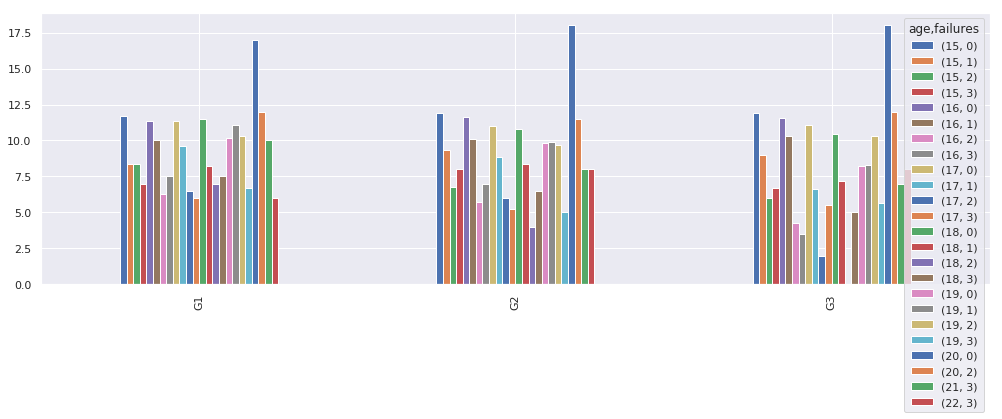

In [0]:
df.groupby(["age", "failures"])["G1", "G2", "G3"].mean().T.plot.bar(figsize=(17, 5))

#### On remarque donc que les étudiants ayant les meilleures notes en moyenne (et de très loin) sont ceux de 20 ans qui n'ont jamais eu d'échec scolaire.

## Rapport entre le parcours/projet scolaire et les résultats aux examens

[Text(0,0.5,'notes moyennes'), Text(0.5,0,'examens'), Text(0.5,1,'schoolsup')]

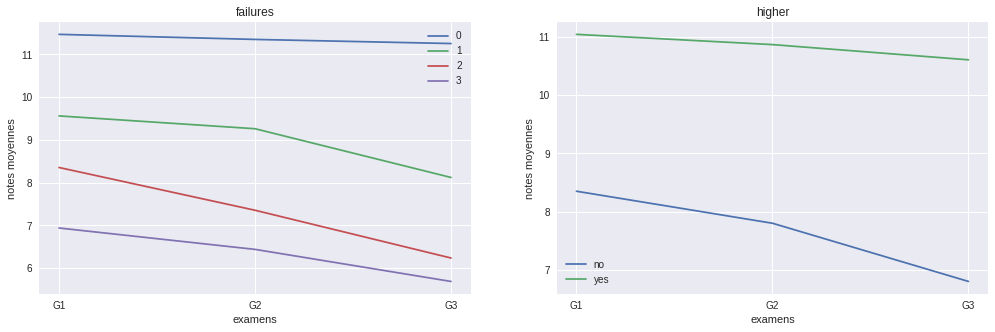

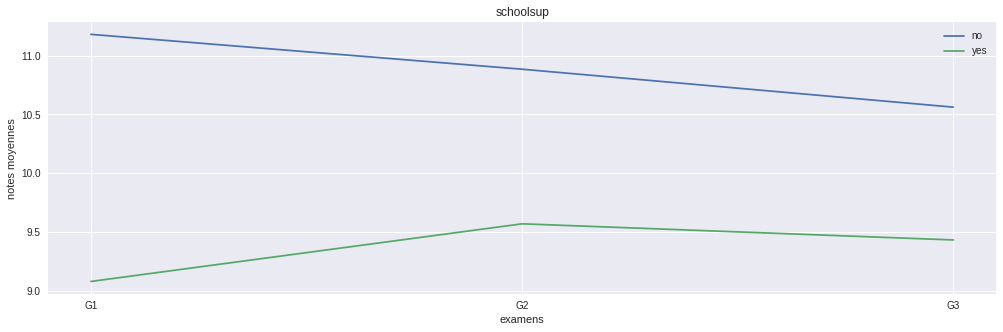

In [0]:
fig = plt.figure(figsize = (17,5))
fig2 = plt.figure(figsize = (17,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig2.add_subplot(1,1,1)

ax1.plot(df.groupby(["failures"])["G1", "G2", "G3"].mean().T)
ax1.legend("0123")
ax1.set(title="failures", xlabel="examens", ylabel="notes moyennes")
ax2.plot(df.groupby(["higher"])["G1", "G2", "G3"].mean().T)
ax2.legend(["no", "yes"])
ax2.set(title="higher", xlabel="examens", ylabel="notes moyennes")
ax3.plot(df.groupby(["schoolsup"])["G1", "G2", "G3"].mean().T)
ax3.legend(["no", "yes"])
ax3.set(title="schoolsup", xlabel="examens", ylabel="notes moyennes")

**On remarque que pour les échecs, ceux qui n'en ont pas sont constants dans les résultats sur les trois examens. On remarque également une différence très nette dans les résultats entre les étudiants souhaitant continuer leurs études et ceux qui ne le souhaite pas (environ 3,5 points de différence en moyenne sur le premier et encore plus sur les deux examens suivant). Pour ce qui est des cours particuliers, on voit que ceux qui n'en prennent pas ont des résultats meilleurs que ceux qui en prennent, mais leurs résultats baisse sur les trois examens, tandis que ceux qui prennent des cours particulier remonte la pente sur le deuxième examen et redescendent de très peu sur le troisième examen.**

## 4. Conclusion

#### L'analyse de ce dataset nous a permis de relever certaines correlations entre les différentes features permettant de prédire la réussite ou non à l'examen final.

#### La plus flagrante et logique étant la réussite ou non aux 2 précédents examens G1 et G2. Ces notes intermédiaires reflètent donc bien le niveau scolaire d'un élève et ceux-ci conservent la plus part du temps ce niveau en fin d'année.

#### Le niveau d'étucation des parents entre en jeu également dans la réussite d'un élève. Ainsi, plus les parents ont un niveau élevé d'étude, plus les enfants ont de chance de réussir leurs partiels. A noté que si les parents ne sont pas du tout éduqué, les enfants ont tout de même un bon taux de réussite que l'on peut interprété comme une envie de ne pas finir comme leurs parents.

#### Si les étudiants désirent poursuivre leurs études à l'université, ils sont plus susceptibles de réussir leurs études secondaires. Une participation à des cours de rattrapage est signe de difficultés scolaires et ces étudiants ont plus de risque de rater leurs examens. De même, le nombre d'échecs précédents permettent de déceler des élèves moins assidus et risquant de rater leurs examens. L'âge des étudiants peut être correlée avec ces redoublements et échecs scolaires.